# Librería XARRAY
http://xarray.pydata.org/en/stable/

<img src="http://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png" witdh="400px" />

Veamos la web:
- http://xarray.pydata.org/en/stable/getting-started-guide/why-xarray.html

Instalación:
- En nuestro entorno virtual instalamos, la librería y otra funcionalidad: 
```bash
python3 -m pip install xarray netCDF4
```

In [1]:
import xarray as xr
import netCDF4

In [4]:
# Vamos a cargar datos demo de la propia librería.

### Algunas veces, hay problemas para validar certificados de SSL según nuestra ubicación, como
### por ejemplo para descargarnos datos de internet. Por ello, primero creamos un certificado
### y posteriormente, podemos descargar datos de ejemplo que vienen en la propia librería
import urllib.request
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
response = urllib.request.urlopen('https://www.python.org')
####

ds = xr.tutorial.open_dataset('air_temperature')

### Información genérica de un datastore/xarray

In [5]:
ds.info() # Similar a un dataframe

xarray.Dataset {
dimensions:
	lat = 25 ;
	lon = 53 ;
	time = 2920 ;

variables:
	float32 lat(lat) ;
		lat:standard_name = latitude ;
		lat:long_name = Latitude ;
		lat:units = degrees_north ;
		lat:axis = Y ;
	float32 air(time, lat, lon) ;
		air:long_name = 4xDaily Air temperature at sigma level 995 ;
		air:units = degK ;
		air:precision = 2 ;
		air:GRIB_id = 11 ;
		air:GRIB_name = TMP ;
		air:var_desc = Air temperature ;
		air:dataset = NMC Reanalysis ;
		air:level_desc = Surface ;
		air:statistic = Individual Obs ;
		air:parent_stat = Other ;
		air:actual_range = [185.16 322.1 ] ;
	float32 lon(lon) ;
		lon:standard_name = longitude ;
		lon:long_name = Longitude ;
		lon:units = degrees_east ;
		lon:axis = X ;
	datetime64[ns] time(time) ;
		time:standard_name = time ;
		time:long_name = Time ;

// global attributes:
	:Conventions = COARDS ;
	:title = 4x daily NMC reanalysis (1948) ;
	:description = Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level valu

In [20]:
ds.attrs # y los metadatos asociados

{'Conventions': 'COARDS',
 'title': '4x daily NMC reanalysis (1948)',
 'description': 'Data is from NMC initialized reanalysis\n(4x/day).  These are the 0.9950 sigma level values.',
 'platform': 'Model',
 'references': 'http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html'}

In [21]:
ds.attrs["title"]

'4x daily NMC reanalysis (1948)'

### Información númerica 

In [9]:
ds.dims #Listado de dimensiones sobre los datos

Frozen(SortedKeysDict({'lat': 25, 'time': 2920, 'lon': 53}))

In [10]:
ds.dims["lat"]

25

In [14]:
ds.coords #las dimensiones están definidas en coords.

Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

In [15]:
ds.coords["lat"] # podemos acceder a los valores de dichas dimensiones

<xarray.DataArray 'lat' (lat: 25)>
array([75. , 72.5, 70. , 67.5, 65. , 62.5, 60. , 57.5, 55. , 52.5, 50. , 47.5,
       45. , 42.5, 40. , 37.5, 35. , 32.5, 30. , 27.5, 25. , 22.5, 20. , 17.5,
       15. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

### Variables dentro de las dimensiones

In [11]:
ds.data_vars # Variables disponibles y su dimensión asociada

Data variables:
    air      (time, lat, lon) float32 ...

In [12]:
ds.air # accedemos directamente a la variables: 
#Qué información hay disponible? 
#Qué extra nos proporciona jupyter-notebook?

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

#### Herencia de numpy

In [49]:
air = ds.air
air.head()

<xarray.DataArray 'air' (time: 5, lat: 5, lon: 5)>
array([[[241.2    , 242.5    , 243.5    , 244.     , 244.09999],
        [243.79999, 244.5    , 244.7    , 244.2    , 243.39   ],
        [250.     , 249.79999, 248.89   , 247.5    , 246.     ],
        [266.5    , 267.1    , 267.1    , 266.69998, 265.9    ],
        [274.5    , 274.29   , 274.1    , 274.     , 273.79   ]],

       [[242.09999, 242.7    , 243.09999, 243.39   , 243.59999],
        [243.59999, 244.09999, 244.2    , 244.09999, 243.7    ],
        [253.2    , 252.89   , 252.09999, 250.79999, 249.29999],
        [269.69998, 269.4    , 268.6    , 267.4    , 266.     ],
        [272.5    , 271.5    , 270.4    , 269.4    , 268.5    ]],

       [[242.29999, 242.2    , 242.29999, 242.5    , 242.89   ],
        [244.59999, 244.39   , 244.     , 243.39   , 242.79999],
        [256.19998, 255.5    , 254.2    , 252.29999, 250.2    ],
        [269.29   , 268.5    , 267.     , 265.     , 262.69998],
        [271.9    , 271.79   , 271.6    , 270.69998, 269.4    ]],

       [[241.89   , 241.79999, 241.79999, 242.09999, 242.59999],
        [246.29999, 245.29999, 244.2    , 243.29999, 242.59999],
        [256.6    , 254.7    , 252.09999, 249.39   , 247.     ],
        [267.69998, 266.29   , 264.4    , 262.19998, 259.79   ],
        [272.79   , 272.4    , 271.9    , 271.4    , 270.69998]],

       [[243.2    , 243.09999, 243.09999, 243.29999, 243.59999],
        [246.39   , 245.29999, 244.2    , 243.2    , 242.59999],
        [254.79999, 253.09999, 250.89   , 248.7    , 246.79999],
        [265.69998, 265.1    , 264.19998, 263.1    , 261.79   ],
        [273.69998, 273.6    , 273.4    , 273.29   , 273.1    ]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ... 2013-01-02
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [50]:
print(air.mean().values)
print(air.std().values)

281.25513
16.32041


In [57]:
xr.where(air>269,air,air)[0] # http://xarray.pydata.org/en/stable/generated/xarray.where.html#

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
        238.59999],
       [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
        239.29999],
       [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
        241.7    ],
       ...,
       [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
        294.69998],
       [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
        295.19998],
       [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
        296.6    ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01

(array([   2182.,   60537.,  195026.,  233763.,  315219.,  635948.,
         778807., 1192236.,  453381.,    1901.]),
 array([221.     , 230.64   , 240.28   , 249.92   , 259.56   , 269.2    ,
        278.84   , 288.47998, 298.12   , 307.76   , 317.4    ],
       dtype=float32),
 <BarContainer object of 10 artists>)

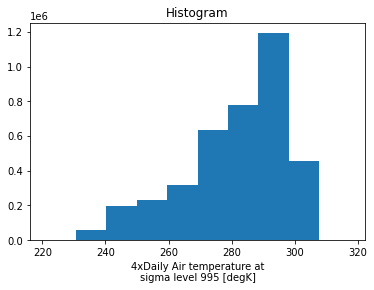

In [58]:
air.plot()

In [63]:
%%time  # Manera de computar el tiempo de ejecución de una celda
air_mean = air.groupby('time.month').mean('time') # Podemos agrupar por dimensiones! 
air2 = air - air_mean
air2

CPU times: user 83.3 ms, sys: 65.9 ms, total: 149 ms
Wall time: 184 ms


<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53, month: 12)>
array([[[[-5.14987183e+00, -5.47715759e+00, -9.83168030e+00, ...,
          -2.06136017e+01, -1.25448456e+01, -6.77099609e+00],
         [-3.88607788e+00, -3.90576172e+00, -8.17987061e+00, ...,
          -1.87125549e+01, -1.11448669e+01, -5.52117920e+00],
         [-2.71517944e+00, -2.44839478e+00, -6.68945312e+00, ...,
          -1.70036011e+01, -9.99716187e+00, -4.41302490e+00],
         ...,
         [-1.02611389e+01, -9.05839539e+00, -9.39399719e+00, ...,
          -1.53933716e+01, -1.01606750e+01, -6.97190857e+00],
         [-8.58795166e+00, -7.50210571e+00, -7.61483765e+00, ...,
          -1.35699463e+01, -8.43449402e+00, -5.52383423e+00],
         [-7.04670715e+00, -5.84384155e+00, -5.70956421e+00, ...,
          -1.18162537e+01, -6.54209900e+00, -4.02824402e+00]],

        [[-5.05761719e+00, -4.00010681e+00, -9.17195129e+00, ...,
          -2.52222595e+01, -1.53296814e+01, -5.93362427e+00],
         [-4.40733337e+00, -3.25991821e+00, -8.36616516e+00, ...,
          -2.44294434e+01, -1.41292725e+01, -5.66036987e+00],
         [-4.01040649e+00, -2.77757263e+00, -7.87347412e+00, ...,
          -2.40147858e+01, -1.34914398e+01, -5.78581238e+00],
...
          -3.56890869e+00, -2.47412109e+00, -1.16558838e+00],
         [ 6.08795166e-01,  1.47219849e+00,  1.11965942e+00, ...,
          -3.59872437e+00, -2.50396729e+00, -1.15667725e+00],
         [ 6.59942627e-01,  1.48742676e+00,  1.03787231e+00, ...,
          -3.84628296e+00, -2.71829224e+00, -1.33132935e+00]],

        [[ 5.35827637e-01,  4.01092529e-01,  3.08258057e-01, ...,
          -1.68054199e+00, -1.12142944e+00, -1.90887451e-01],
         [ 8.51684570e-01,  8.73504639e-01,  6.26892090e-01, ...,
          -1.33462524e+00, -7.66601562e-01,  1.03210449e-01],
         [ 1.04107666e+00,  1.23202515e+00,  8.63311768e-01, ...,
          -1.06607056e+00, -5.31036377e-01,  3.14453125e-01],
         ...,
         [ 4.72015381e-01,  1.32940674e+00,  1.15509033e+00, ...,
          -3.23403931e+00, -2.23956299e+00, -1.11035156e+00],
         [ 4.14459229e-01,  1.23419189e+00,  1.07876587e+00, ...,
          -3.47311401e+00, -2.56188965e+00, -1.37548828e+00],
         [ 5.35278320e-02,  8.10333252e-01,  6.73461914e-01, ...,
          -4.07232666e+00, -3.12890625e+00, -1.84762573e+00]]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

## <span style="color:blue">Actividad</span>

Vamos a utilizar el fichero "dep0002_idrifter003_scb-idrifter003_L1_2012-02-28.nc" para analizar características del mismo.
Por cierto, ¿Os suena el fichero?

In [65]:
file = "dep0002_idrifter003_scb-idrifter003_L1_2012-02-28.nc"
path = ""#ajusta su ubicacion 
ds = xr.open_dataset(path+file, engine="netcdf4")

In [67]:
## ¿Qué info podemos encontrar en dicho fichero?

## ¿Qué atributos posee?


In [71]:
## ¿Qué institution lo ha creado?


('SOCIB Data Center', 'SOCIB Data Center')

In [70]:
##  ¿Qué dimensiones y coordenadas podemos encontrar ?


(Frozen(SortedKeysDict({'time': 124})),
 Coordinates:
   * time     (time) datetime64[ns] 2012-02-28T09:33:00 ... 2012-03-09T02:44:00
     LAT      (time) float64 ...
     LON      (time) float64 ...
     DEPTH    float64 ...)

In [ ]:
## ¿Que variables hay definidas ? 


In [69]:
## ¿Cuantas muestras de temperatura sobre el agua tenemos: WTEM?


124

In [72]:
# ¿Como podemos seleccionar las muestras especificas entre dos "horas"?
start_time = "2012-02-28T09:33:00"
end_time = "2012-02-28T019:33:00"
# Pistas: función sel() sobre una de las dimensiones...
# http://xarray.pydata.org/en/stable/generated/xarray.Dataset.sel.html
# y sobre un slice de tiempos... http://xarray.pydata.org/en/stable/user-guide/indexing.html



<xarray.Dataset>
Dimensions:       (time: 21)
Coordinates:
  * time          (time) datetime64[ns] 2012-02-28T09:33:00 ... 2012-02-28T19...
    LAT           (time) float64 ...
    LON           (time) float64 ...
    DEPTH         float64 ...
Data variables:
    trajectory    |S12 ...
    QC_LAT        (time) float32 ...
    QC_LON        (time) float32 ...
    PSPEED        (time) float64 ...
    QC_PSPEED     (time) float32 ...
    WTEM          (time) float64 ...
    QC_WTEM       (time) float32 ...
    VOLT          (time) float64 ...
    QC_VOLT       (time) float32 ...
    LOCCLASS      (time) float64 ...
    NUM_SAT       (time) float64 ...
    CRAD          (time) float64 ...
    GPS_FIX_TIME  (time) timedelta64[ns] ...
    SECS_FIX_GPS  (time) float64 ...
    TD            (time) float64 ...
    TR            (time) float64 ...
Attributes:
    title:                         Data from instrument SCB-IDRIFTER003 on pl...
    institution:                   SOCIB (Sistema de Observación y predicción...
    netcdf_version:                3.5
    Conventions:                   CF-1.6
    date_created:                  2012-02-28T10:58:51+00:00
    date_update:                   2012-08-28T08:30:36+00:00
    date_modified:                 2012-08-28T08:30:36+00:00
    cdm_data_type:                 Trajectory
    CF:featureType:                trajectory
    featureType:                   trajectory
    data_mode:                     R
    processing_level:              L1 - Derived variables and quality control...
    platform_code:                 79
    instrument_code:               220
    id:                            79_220_2012-08-28T08:30:36+00:00
    kewords_vocabulary:            http://gcmd.nasa.gov/Resources/valids/arch...
    standard_name_vocabulary:      http://cf-pcmdi.llnl.gov/documents/cf-stan...
    geospatial_lat_min:            39.7438
    geospatial_lat_max:            40.068
    geospatial_lon_min:            2.5932
    geospatial_lon_max:            3.363
    geospatial_vertical_min:       0.0
    geospatial_vertical_max:       0.0
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    geospatial_vertical_units:     m
    geospatial_vertical_positive:  down
    time_coverage_start:           2012-02-28T09:33:00+00:00
    time_coverage_end:             2012-03-09T02:44:00+00:00
    time_coverage_duration:        P0Y0M9DT17H11M0.000S
    time_coverage_resolution:      P0Y0M0DT0H0M0.000S
    data_center:                   SOCIB Data Center
    data_center_email:             info@socib.es
    institution_references:        http://www.socib.es
    principal_investigator:        Prof. Joaquim Tintoré Subirana
    principal_investigator_email:  jtintore@socib.es
    project:                       SOCIB Operational
    author:                        Benjamín Casas Pérez
    author_email:                  bcasas@socib.es
    creator_name:                  Benjamín Casas Pérez
    creator_url:                   http://www.imedea.uib.es/~benjamin/index.php
    creator_email:                 bcasas@socib.es
    contributor_name:              SOCIB
    publisher_name:                SOCIB
    publisher_url:                 http://www.socib.es
    publisher_email:               info@socib.es
    distribution_statement:        Approved for public release. Distribution ...
    license:                       Approved for public release. Distribution ...
    citation:                      Balearic Island Coastal and Observing Fore...
    acknowledgement:               Ministerio de ciencia e innovación (http:/...
    update_interval:               every 14400 seconds
    history:                       Thu Jan 29 09:11:06 2015: ncatted -O -a fl...
    summary:                       Deployment of drifter SCB-IDRIFTER003 at n...
    abstract:                      Deployment of drifter SCB-IDRIFTER003 at n...

In [74]:
# ¿Cuál es la temperatura media?
temperature = ds.WTEM
temperature.mean()

<xarray.DataArray 'WTEM' ()>
array(11.25919355)
Coordinates:
    DEPTH    float64 0.0

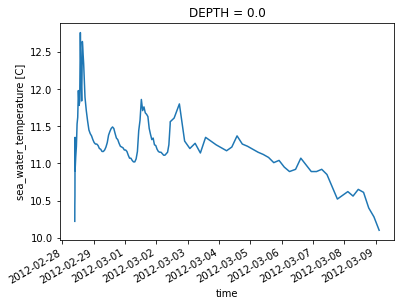

In [76]:
# Puedes representar una grafíca de la temperatura del agua


In [65]:
# Puedes agrupar la temperatura del agua por las horas del día 
# y además. listar los grupos y los diferentes datasets que surgen de dicha agrupación


0
<xarray.DataArray 'WTEM' (time: 3)>
array([11.28, 11.18, 11.19])
Coordinates:
  * time     (time) datetime64[ns] 2012-02-29T00:23:00 ... 2012-03-02T00:36:00
    LAT      (time) float64 39.99 40.05 40.04
    LON      (time) float64 2.753 3.017 3.096
    DEPTH    float64 0.0
Attributes:
    standard_name:        sea_water_temperature
    units:                C
    long_name:            sea_water_temperature
    ancillary_variables:  QC_WTEM
    original_units:       C
    observation_type:     measured
    precision:            0.0001
1
<xarray.DataArray 'WTEM' (time: 6)>
array([11.26, 11.16, 11.16, 11.2 , 11.21, 11.19])
Coordinates:
  * time     (time) datetime64[ns] 2012-02-29T01:24:00 ... 2012-03-05T01:56:00
    LAT      (time) float64 40.0 40.05 40.04 40.07 40.02 39.95
    LON      (time) float64 2.766 3.021 3.096 3.14 3.258 3.34
    DEPTH    float64 0.0
Attributes:
    standard_name:        sea_water_temperature
    units:                C
    long_name:            sea_water_temp

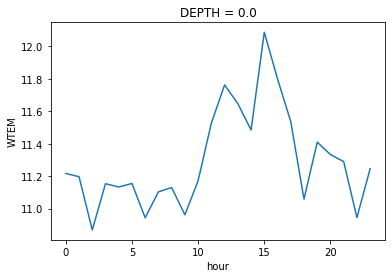

In [64]:
# Puedes visualizar la temperatura media del agua por ahora 


# Paralelización del computo


In [112]:
ds = xr.tutorial.open_dataset('air_temperature')
print("DIMs ",ds.dims)
print("Total samples: %i"%len(ds.time))
print("Min timestamp %s"%ds.time.min().values)
print("Max timestamp %s"%ds.time.max().values)

import numpy as np
import pandas as pd
print("Time serie frequency: ",pd.infer_freq(ds.time.values))

DIMs  Frozen(SortedKeysDict({'lat': 25, 'time': 2920, 'lon': 53}))
Total samples: 2920
Min timestamp 2013-01-01T00:00:00.000000000
Max timestamp 2014-12-31T18:00:00.000000000
Time serie frequency:  6H


In [119]:
%%time
ds.groupby("time.hour").std() # No es un gran fichero!!! 


CPU times: user 903 ms, sys: 11.4 ms, total: 914 ms
Wall time: 921 ms


<xarray.Dataset>
Dimensions:  (hour: 4, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * hour     (hour) int64 0 6 12 18
Data variables:
    air      (hour, lat, lon) float32 11.89 11.85 11.87 ... 1.72 1.786 1.879

# ¿Cómo podemos optimizar su ejecución ? Necesitamos paralalelizar

Una **sintetizada historia** de conceptos, arquitecturas y tecnologías computacionales
- Taxonomía Flynn: <a href="https://es.wikipedia.org/wiki/Taxonom%C3%ADa_de_Flynn" target="_blank"> Wiki </a>
    
- Paralelizar https://es.wikipedia.org/wiki/MapReduce
    - GPU 
    - Distribution (technologías: Virtual Machines, Containers (Dockers), Serverless)

Frameworks de trabajo:
- CUDA
- Dask 
- Hadoop, Spark (https://docs.dask.org/en/latest/spark.html)


# DASK
https://dask.org/

- Chunks 

https://docs.dask.org/en/latest/

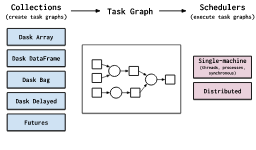


### Caso de cluster con Dockers

https://docs.dask.org/en/latest/setup.html

En mi github tenéis disponible este proyecto:
https://github.com/wisaaco/test_dask

docker-compose.yml
```dockerfile
version: "3.1"

services:
  scheduler:
    image: daskdev/dask
    hostname: dask-scheduler
    ports:
      - "8786:8786"
      - "8787:8787"
    command: ["dask-scheduler"]

  worker:
    image: daskdev/dask
    hostname: dask-worker1
    command: ["dask-worker", "tcp://scheduler:8786"]

  worker2:
    image: daskdev/dask
    hostname: dask-worker2
    command: ["dask-worker", "tcp://scheduler:8786"]

  jupyter:
    hostname: jupyter-dask
    build:
      eljupyter/.
    ports:
      - "8888:8888"
```


Dockerfile

```dockerfile
FROM daskdev/dask-notebook

RUN apt-get update -y && apt-get install -y python3-pip libsnappy-dev
RUN pip install dask
RUN pip install distributed
RUN pip install xarray
```

#### Y así sería todo esto:

Desde la terminal, accedemos a la máquina/servidor y lanzamos nuestro proyecto git/cluster con docker:
```bash
ssh user@ip
docker-compose up #en el path del proyecto docker-compose.yml
```

Desde otra terminal, accedemos vinculamos puertos entre nuestra máquina y otra:
```bash
ssh -L 8080:localhost:8888 user@ip
````

TIP: comando *SCREEN* https://linuxize.com/post/how-to-use-linux-screen/

Y ahora podremos probar esto https://examples.dask.org/xarray.html con nuestro cliente conectado: 
```python
import xarray as xr
from dask.distributed import Client, progress
c = Client("scheduler:8786")
c
```

**ATENCIÓN**: Estamos ejecutando sobre el clúster! 

# Librería Numba 

<img src="http://numba.pydata.org/_static/numba-blue-horizontal-rgb.svg" width="300px"/>
     
http://numba.pydata.org/

In [ ]:
# EJEMPLO DE: 
# https://ipython-books.github.io/53-accelerating-array-computations-with-numexpr/
# Nota: Libro básico con algunos ejemplos curiosos.

from numba import jit
import numpy as np

In [3]:
size = 400
iterations = 100
def mandelbrot_python(size, iterations):
    m = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            c = (-2 + 3. / size * j +
                 1j * (1.5 - 3. / size * i))
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z * z + c
                    m[i, j] = n
                else:
                    break
    return m

In [5]:
%%time
m = mandelbrot_python(size, iterations)

CPU times: user 6.3 s, sys: 39 ms, total: 6.34 s
Wall time: 6.41 s


In [ ]:
# Numba facilita la paralelización de invocaciones mediante decoradores
# El grado de paralelización dependerá de la dependencia de variables
@jit
def mandelbrot_numba(size, iterations):
    m = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            c = (-2 + 3. / size * j +
                 1j * (1.5 - 3. / size * i))
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z * z + c
                    m[i, j] = n
                else:
                    break
    return m

In [7]:
%%time
m = mandelbrot_numba(size, iterations)

CPU times: user 492 ms, sys: 54.9 ms, total: 547 ms
Wall time: 517 ms


#### Veamos ese mismo código en un buen equipo (con GPU) :
Tengo preparado el anterior código en: test_numba_1.py en buen servidor "deepblue"

```bash
ssh isaac@deepblue
```

## Especificando la firma de la función

In [4]:
%%time
#Con numba se consigue un ligero incremento del rendimiento si se especifica el tipo de signature/firma de la función
# http://numba.pydata.org/numba-doc/0.31.0/reference/types.html#numbers
from numba import jit, int32, float64

@jit(float64(int32, int32))
def f(x, y):
    return x + y /2.0

print(f(3,5))

5.5
CPU times: user 43.5 ms, sys: 1.74 ms, total: 45.2 ms
Wall time: 44.5 ms


## Tipos de compilación en Numba
http://numba.pydata.org/numba-doc/0.31.0/reference/jit-compilation.html

- nopython mode: *the Numba compiler will generate code that does not access the Python C API. This mode produces the highest performance code, but requires that the native types of all values in the function can be inferred.* 
- object mode: *the Numba compiler generates code that handles all values as Python objects and uses the Python C API to perform all operations on those objects. Code compiled in object mode will often run no faster than Python interpreted code.*


**Numba will by default automatically use object mode if nopython mode cannot be used for some reason.**


In [3]:
%%time
from numba import jit, int32, float64

@jit(float64(int32, int32),nopython=True)
def f(x, y):
    return x + y /2.0

print(f(3,5))

5.5
CPU times: user 43.5 ms, sys: 1.79 ms, total: 45.3 ms
Wall time: 44.4 ms


### Vectorización 

In [45]:
import math
import numpy as np
npoints = int(1e7)
a = np.arange(npoints, dtype=np.float32)
print(a[:10])
print(a[-10:])

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[9999990. 9999991. 9999992. 9999993. 9999994. 9999995. 9999996. 9999997.
 9999998. 9999999.]


In [46]:
%%time
for x in a:    
    math.sqrt(x)
    
#### EVITAD HACER ESTO!!!!! NEVER!    

CPU times: user 2.09 s, sys: 9.59 ms, total: 2.1 s
Wall time: 2.11 s


In [47]:
%%time
np.sqrt(a)

CPU times: user 13.3 ms, sys: 10.9 ms, total: 24.2 ms
Wall time: 22.7 ms


array([0.0000000e+00, 1.0000000e+00, 1.4142135e+00, ..., 3.1622771e+03,
       3.1622773e+03, 3.1622776e+03], dtype=float32)

In [16]:
from numba import vectorize 

@vectorize
def cpu_sqrt(x):
  return math.sqrt(x)

In [17]:
%%time
cpu_sqrt(a)

CPU times: user 72.2 ms, sys: 15.7 ms, total: 87.9 ms
Wall time: 99.1 ms


array([0.0000000e+00, 1.0000000e+00, 1.4142135e+00, ..., 3.1622771e+03,
       3.1622773e+03, 3.1622776e+03], dtype=float32)

### CUDA PROGRAMING

In [ ]:
##### ATENCION SOLO CON GPU
##### ISAAC -> en servidor deepblue
##### file: test_numba_2.py
import math
import time
from numba import vectorize, cuda
import numpy as np

print(cuda.gpus)

npoints = int(1e7)
a = np.arange(npoints, dtype=np.float32)

@vectorize(['float32(float32)'], target='cuda')
def cpu_sqrt(x):
    return math.sqrt(x)


start = time.time()
cpu_sqrt(a)    
end = time.time()
ts = (end - start)*1000
print("Elapsed (after compilation) = %f" % ts)

```bash 
isaac@deepblue:~$ python3 test_numba_2.py 
Elapsed (after compilation) = 512.6230716705322
```

### Si queremos algo más complejo, tendremos que programar dentro del paradigma de CUDA
https://numba.pydata.org/numba-doc/dev/cuda/kernels.html

In [ ]:
## test_numba_3.py on server "deepblue"
import numpy
import time
from numba import cuda

@cuda.jit
def my_kernel(io_array):
    # Thread id in a 1D block
    tx = cuda.threadIdx.x
    # Block id in a 1D grid
    ty = cuda.blockIdx.x
    # Block width, i.e. number of threads per block
    bw = cuda.blockDim.x
    # Compute flattened index inside the array
    pos = tx + ty * bw
    if pos < io_array.size:  # Check array boundaries
        io_array[pos] *= 2 # do the computation


data = numpy.ones(256)

threadsperblock = 32 

blockspergrid = (data.size + (threadsperblock - 1)) // threadsperblock

start = time.time()
my_kernel[blockspergrid, threadsperblock](data)
end = time.time()
# Print the result
print(data)
print("Elapsed (after compilation) = %s" % (end-start))

### Como siempre, acudamos a la documentación: 
- https://numba.pydata.org/numba-doc/latest/user/5minguide.html
- https://numba.pydata.org/numba-examples/

# <span style="color:red">Consideraciones generales de rendimiento:</span>
- Evitad utilizar vuestro ordenador/portátil
- Evitad utilizar entornos como Spyder o Jupyter Notebooks. Ejecutar scripts directamente desde consola.
- Usad funciones ya existentes dentro del core de las librerias (i.e. math.sqrt vs np.sqrt)
- Considerad tener un servidor o un conjunto de equipos (cluster) donde lanzar código preparado para ello, por ejemplo, con dask o apache spark. 
- Una opción *bestial* es tener una buena **GPU**; pero la "potencia" sin control no sirve para nada.

Nota no olvidéis cosas básicas, no todo funciona! 
    

In [26]:
import time

def factorial(n):
    return n * factorial(n-1) if n else 1

start = time.time()
factorial(12)
print("Taken1: ",(time.time()-start)*1000)

start = time.time()
factorial(431)
print("Taken2: ",(time.time()-start)*1000)

Taken1:  0.06031990051269531
Taken2:  0.20003318786621094


In [27]:
from functools import lru_cache

@lru_cache(maxsize=256)
def factorial(n):
    return n * factorial(n-1) if n else 1


start = time.time()
factorial(12)
print("Taken1: ",(time.time()-start)*1000)

start = time.time()
factorial(431)
print("Taken2: ",(time.time()-start)*1000)

Taken1:  0.06413459777832031
Taken2:  0.3020763397216797


# <span style="color:blue">Actividad con NUMBA</span>
Haz las pertinentes modificaciones del algoritmo buble-sort para que funcione con numba.
El código lo puedes encontrar aquí:
https://www.geeksforgeeks.org/python-program-for-bubble-sort/
No olvides comparar los tiempos entre la versión original y la mejorada.

In [43]:
%%time
import numpy as np

def bubbleSort(arr):
    n = len(arr)
    for i in range(n-1):
        for j in range(0, n-i-1):
            if arr[j] > arr[j + 1] :
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

# Driver code to test above
arr = np.array([64, 34, 25, 12, 22, 11, 90], dtype='i4')

bubbleSort(arr)

print ("Sorted array is:")
for i in range(len(arr)):
    print ("% d" % arr[i])

Sorted array is:
 11
 12
 22
 25
 34
 64
 90
CPU times: user 434 µs, sys: 120 µs, total: 554 µs
Wall time: 473 µs


In [ ]:
### VERSION EN JIT